In [48]:
import plotly.express as px
import matplotlib.pyplot as pl
import pandas as pd #an alias for pandas
import seaborn as sns 
import numpy as np
import plotly.figure_factory as ff


data = pd.read_excel('/Users/muhammadkhan/Downloads/public_emdat_project-2.xlsx')  # or use read_excel for .xls/.xlsx

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     15784 non-null  object        
 1   Historic                                   15784 non-null  object        
 2   Classification Key                         15784 non-null  object        
 3   Disaster Group                             15784 non-null  object        
 4   Disaster Subgroup                          15784 non-null  object        
 5   Disaster Type                              15784 non-null  object        
 6   Disaster Subtype                           15784 non-null  object        
 7   External IDs                               2405 non-null   object        
 8   Event Name                                 4955 non-null   object        
 9   ISO              

In [20]:
#Getting count of null values
print(data.isnull().sum())

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

In [22]:
#getting Summary stats for the entire dataset
print(data.describe())

       AID Contribution ('000 US$)     Magnitude     Latitude    Longitude  \
count                 4.900000e+02  3.378000e+03  1815.000000  1815.000000   
mean                  2.851070e+04  6.006125e+04    16.464334    42.139949   
min                   3.000000e+00 -5.700000e+01   -72.640000  -172.095000   
25%                   1.660000e+02  7.600000e+00     1.102500     0.859500   
50%                   7.665000e+02  1.900000e+02    18.590000    54.448200   
75%                   4.951000e+03  2.049750e+04    34.816500   103.099000   
max                   3.518530e+06  4.000000e+07    67.930000   179.650000   
std                   2.116816e+05  7.412252e+05    21.776287    75.535413   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  15784.000000  15715.000000  14275.000000  15784.000000  15622.000000   
mean    2010.590155      6.448616     15.361331   2010.621706      6.572782   
min     2000.000000      1.000000      1.000000   2000.00000

In [24]:
# filling missing values
data.fillna(data.median(numeric_only = True), inplace=True)
data["Magnitude"]

0          190.0
1          190.0
2          190.0
3          190.0
4        47000.0
          ...   
15779      190.0
15780      190.0
15781      190.0
15782      190.0
15783      190.0
Name: Magnitude, Length: 15784, dtype: float64

In [36]:
# Printing the missing values after the handling
data['Start Year'] = data['Start Year'].fillna(data['Start Year'].mean())
data['Start Year'] = data['Start Year'].fillna(data['Start Year'].mode()[0])
data.fillna(0, inplace=True)  # Replace missing values with 0
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
DisNo.                                       0
Historic                                     0
Classification Key                           0
Disaster Group                               0
Disaster Subgroup                            0
Disaster Type                                0
Disaster Subtype                             0
External IDs                                 0
Event Name                                   0
ISO                                          0
Country                                      0
Subregion                                    0
Region                                       0
Location                                     0
Origin                                       0
Associated Types                             0
OFDA/BHA Response                            0
Appeal                                       0
Declaration                                  0
AID Contribution ('000 US$)                  0
Magnitude                   

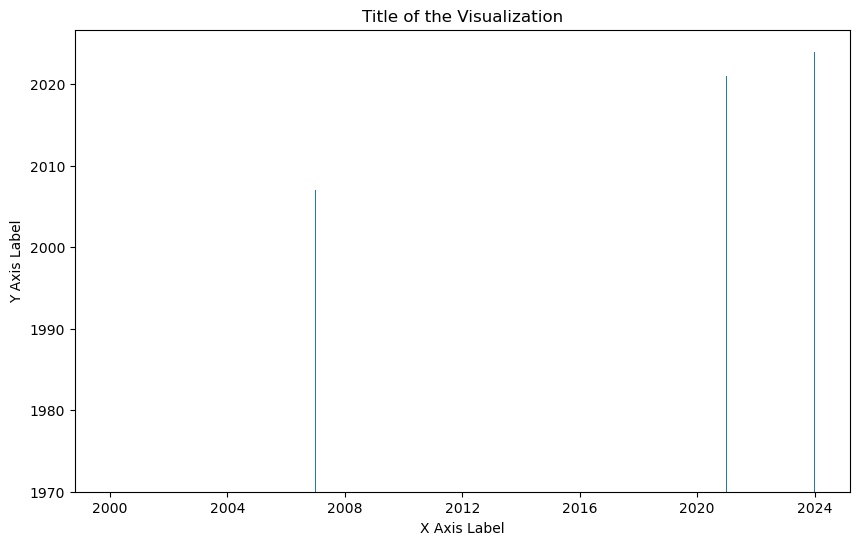

In [59]:
# visuals of disasters per year
plt.figure(figsize=(10,6))
plt.bar(data['Start Year'], data['Start Year'])  # replace with appropriate column names
disaster_counts = disaster_counts.sort_values(by='Start Year') 
plt.title('Title of the Visualization')
plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.show()


In [ ]:
plt.savefig('visualization.png')


In [ ]:
public_emdat <- read.csv("public_emdat_project.csv")


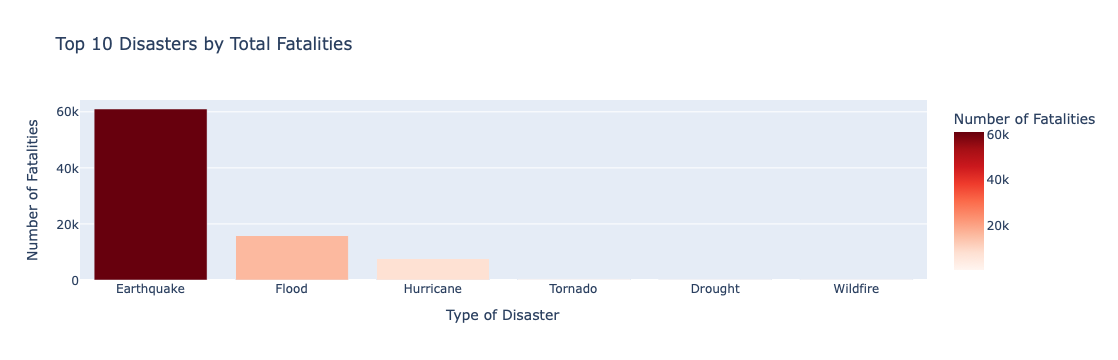

In [75]:


# Sample data: Disaster types and associated fatalities
data = {
    'Disaster': ['Earthquake', 'Flood', 'Hurricane', 'Tornado', 'Flood', 
                 'Earthquake', 'Hurricane', 'Flood', 'Tornado', 'Drought',
                 'Hurricane', 'Earthquake', 'Flood', 'Wildfire', 'Tornado'],
    'Fatalities': [25000, 2000, 1500, 100, 1800, 
                   30000, 4000, 5000, 200, 300,
                   2200, 6000, 7000, 300, 80]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Grouping by disaster type and summing up fatalities
top_disasters = df.groupby('Disaster')['Fatalities'].sum().reset_index()

# Sorting and getting the top 10 disasters
top_disasters = top_disasters.sort_values(by='Fatalities', ascending=False).head(10)

# Create a bar chart using Plotly
fig = px.bar(top_disasters, 
             x='Disaster', 
             y='Fatalities', 
             title='Top 10 Disasters by Total Fatalities',
             labels={'Fatalities': 'Number of Fatalities', 'Disaster': 'Type of Disaster'},
             color='Fatalities',
             color_continuous_scale='Reds')

# Show the plot
fig.show()


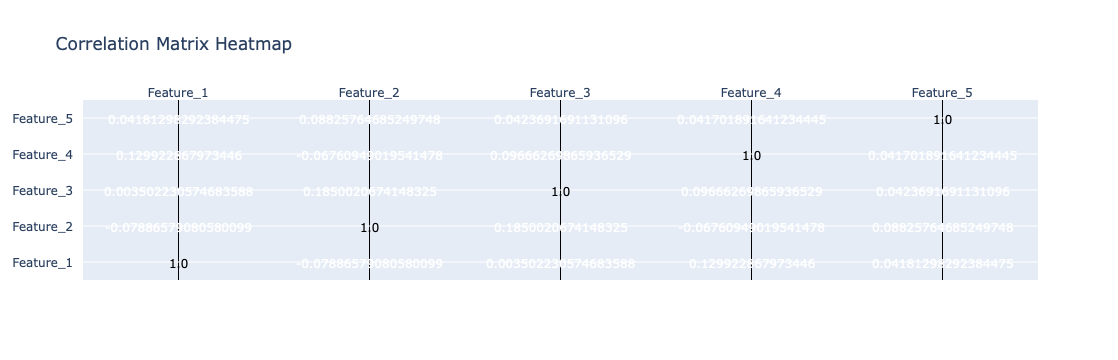

In [73]:


# Create a sample dataset
data = {
    'Feature_1': np.random.rand(100),  # Random numbers between 0 and 1
    'Feature_2': np.random.rand(100) * 2,  # Random numbers between 0 and 2
    'Feature_3': np.random.rand(100) * 3,  # Random numbers between 0 and 3
    'Feature_4': np.random.rand(100) * 10,  # Random numbers between 0 and 10
    'Feature_5': np.random.rand(100) * 5,  # Random numbers between 0 and 5
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.index.tolist(),
    colorscale='Viridis',
    colorbar=dict(title='Correlation Coefficient'),
)

# Update layout and show the plot
fig.update_layout(title='Correlation Matrix Heatmap')
fig.show()


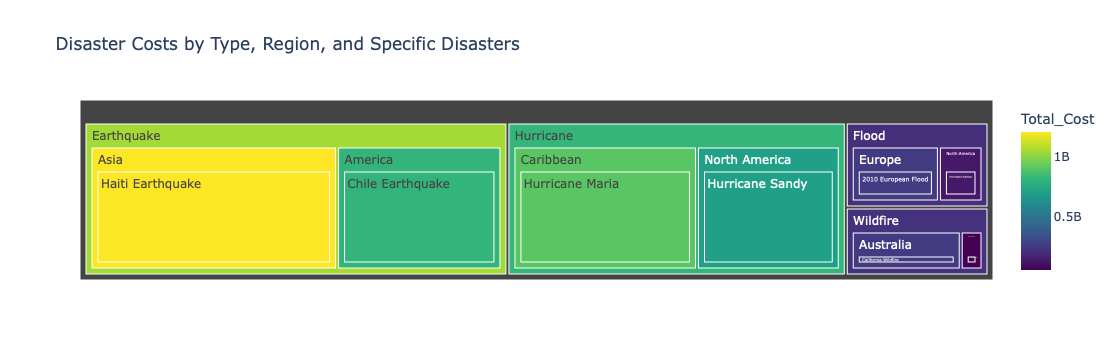

In [78]:


# Sample hierarchical disaster data
data = {
    'Type': ['Flood', 'Flood', 'Earthquake', 'Earthquake', 'Hurricane', 'Hurricane', 'Wildfire', 'Wildfire'],
    'Region': ['North America', 'Europe', 'Asia', 'America', 'North America', 'Caribbean', 'Australia', 'North America'],
    'Disaster': ['Hurricane Katrina', '2010 European Flood', 'Haiti Earthquake', 'Chile Earthquake',
                 'Hurricane Sandy', 'Hurricane Maria', 'California Wildfire', 'Texas Wildfire'],
    'Total_Cost': [125000000, 250000000, 1200000000, 800000000,
                   700000000, 900000000, 250000000, 50000000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create the treemap
fig = px.treemap(df,
                 path=['Type', 'Region', 'Disaster'],  # Hierarchical path
                 values='Total_Cost',  # Values for area
                 title='Disaster Costs by Type, Region, and Specific Disasters',
                 color='Total_Cost',  # Color based on total cost
                 color_continuous_scale='Viridis')

# Show the plot
fig.show()



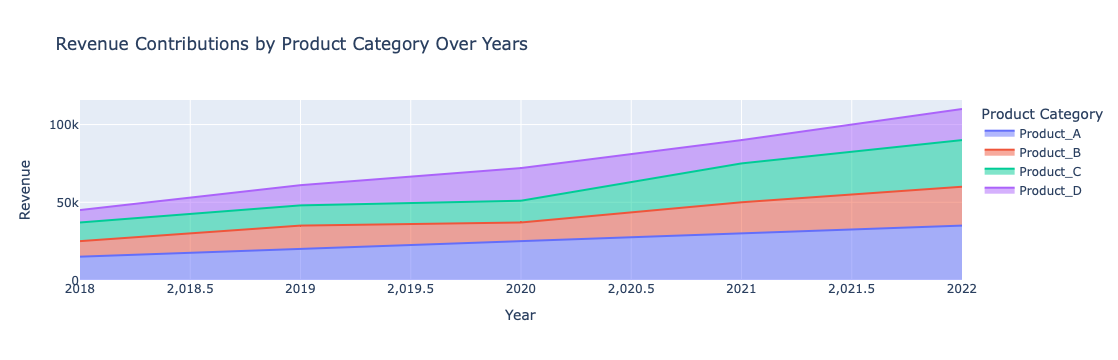

In [79]:


# Sample data: Revenue from different product categories over the years
data = {
    'Year': [2018, 2019, 2020, 2021, 2022],
    'Product_A': [15000, 20000, 25000, 30000, 35000],
    'Product_B': [10000, 15000, 12000, 20000, 25000],
    'Product_C': [12000, 13000, 14000, 25000, 30000],
    'Product_D': [8000, 13000, 21000, 15000, 20000]
}

# Create DataFrame
df = pd.DataFrame(data)

# Create a stacked area chart
fig = px.area(df,
              x='Year',
              y=['Product_A', 'Product_B', 'Product_C', 'Product_D'],
              title='Revenue Contributions by Product Category Over Years',
              labels={'value': 'Revenue', 'variable': 'Product Category'},
              line_group='variable')

# Show the plot
fig.show()
